## Import Libraries

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import model and data

In [3]:
model = keras.models.load_model("model.keras")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 362 (1.42 KB)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242 (972.00 B)

In [4]:
X = pd.read_csv("data.csv")
X.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
X.drop(columns=['Serial No.', 'Chance of Admit '], inplace=True)
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Make predictions

In [7]:
y_pred = model.predict(X)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


## Prepare data for analysis

y_pred is a numpy nd array of shape (500, 1)
y is pandas.core.series.Series of shape (500, )

In [11]:
y_pred.shape

(500, 1)

In [12]:
y = pd.read_csv("data.csv")['Chance of Admit ']

In [14]:
y.shape

(500,)

In [16]:
y_pred = y_pred.flatten()

In [17]:
y_pred.shape == y.shape

True

In [18]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.00329146622257595


## Plot actual vs Predicted

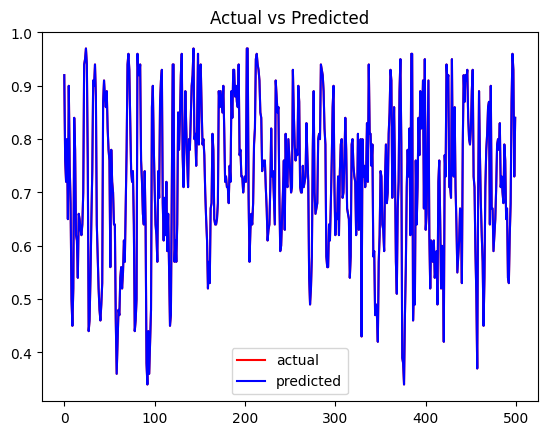

In [29]:
plt.plot(y, color='red', label='actual')
plt.plot(y_pred, color='blue', label='predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()